In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy.linalg import pinv
from scipy.stats import multivariate_normal
from numpy.linalg import norm
from tqdm import tqdm
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler

In [2]:
mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

In [3]:
dataAll = pd.read_csv('housesToRentProcessed.csv')
dataAll

,São Paulo,Porto Alegre,Rio de Janeiro,Campinas,Belo Horizonte,area,rooms,bathroom,parking spaces,floor,isHouse,animal,furniture,y con + alu
0,1,0,0,0,0,70,2,1,1,7,0,1,1,5365
1,1,0,0,0,0,320,4,4,0,20,0,1,0,6160
2,0,1,0,0,0,80,1,1,1,6,0,1,0,3800
3,0,1,0,0,0,51,2,1,0,2,0,1,0,1382
4,1,0,0,0,0,25,1,1,0,1,0,0,0,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10683,0,1,0,0,0,63,2,1,1,5,0,0,1,1880
10684,1,0,0,0,0,285,4,4,4,17,0,1,0,18100
10685,0,0,1,0,0,70,3,3,0,8,0,0,1,6980
10686,0,0,1,0,0,120,2,2,2,8,0,1,1,13585


In [4]:
data = dataAll.iloc[:, :-1]
y = dataAll.iloc[:, -1:]
data

,São Paulo,Porto Alegre,Rio de Janeiro,Campinas,Belo Horizonte,area,rooms,bathroom,parking spaces,floor,isHouse,animal,furniture
0,1,0,0,0,0,70,2,1,1,7,0,1,1
1,1,0,0,0,0,320,4,4,0,20,0,1,0
2,0,1,0,0,0,80,1,1,1,6,0,1,0
3,0,1,0,0,0,51,2,1,0,2,0,1,0
4,1,0,0,0,0,25,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10683,0,1,0,0,0,63,2,1,1,5,0,0,1
10684,1,0,0,0,0,285,4,4,4,17,0,1,0
10685,0,0,1,0,0,70,3,3,0,8,0,0,1
10686,0,0,1,0,0,120,2,2,2,8,0,1,1


In [5]:
data = data.values.astype(float)

# Normalizing
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.903406,-0.354464,-0.404207,-0.294501,-0.364916,-0.147436,-0.432132,-0.878612,-0.383277,0.288957,-0.546934,0.534362,1.761499
1,0.903406,-0.354464,-0.404207,-0.294501,-0.364916,0.318037,1.275939,1.253839,-1.012438,2.496267,-0.546934,0.534362,-0.567698
2,-1.106922,2.821157,-0.404207,-0.294501,-0.364916,-0.128818,-1.286167,-0.878612,-0.383277,0.119163,-0.546934,0.534362,-0.567698
3,-1.106922,2.821157,-0.404207,-0.294501,-0.364916,-0.182812,-0.432132,-0.878612,-1.012438,-0.560009,-0.546934,0.534362,-0.567698
4,0.903406,-0.354464,-0.404207,-0.294501,-0.364916,-0.231222,-1.286167,-0.878612,-1.012438,-0.729802,-0.546934,-1.871392,-0.567698
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10683,-1.106922,2.821157,-0.404207,-0.294501,-0.364916,-0.160470,-0.432132,-0.878612,-0.383277,-0.050630,-0.546934,-1.871392,1.761499
10684,0.903406,-0.354464,-0.404207,-0.294501,-0.364916,0.252871,1.275939,1.253839,1.504205,1.986888,-0.546934,0.534362,-0.567698
10685,-1.106922,-0.354464,2.473982,-0.294501,-0.364916,-0.147436,0.421904,0.543022,-1.012438,0.458750,-0.546934,-1.871392,1.761499
10686,-1.106922,-0.354464,2.473982,-0.294501,-0.364916,-0.054342,-0.432132,-0.167795,0.245884,0.458750,-0.546934,0.534362,1.761499


In [6]:
# Inicialize os parâmetros

# Mi
sums = data.sum(axis=0)
dividirPorN = lambda x: x/data.shape[0]
Mi = dividirPorN(sums)
print(Mi.sum())

1.911312093291811e-16


In [7]:
# W       
D = data.shape[1]   
L = 2
N = data.shape[0]

np.random.seed(42)
W = np.random.normal(0,0.01, size=(D,L))

In [8]:
# sigma2
sigma2 = np.median(data.var(axis=0))
print(sigma2)

0.9999999999999998


In [9]:
def passoE(W, sigma2):
    # Eq1
    M = W.T @ W + sigma2*np.identity(L)
    
    # Eq2
    Minv = pinv(M)
    MinvWT = Minv @ W.T
    Ezis = np.zeros((N, L))
    
    
    # Eq3
    EziziTs = np.zeros((N, L, L))
    s2Minv = sigma2*Minv
    
    for i, xi in enumerate(data):
        # Eq2
        Ezi = MinvWT @ (xi - Mi).reshape((D,1))
        Ezis[i] = Ezi.T

        # Eq3
        Ezi_x_EziT = Ezi @ Ezi.T  
        EziziT = s2Minv + Ezi_x_EziT
        EziziTs[i] = EziziT
    
    return M, Ezis, EziziTs

M, Ezis, EziziTs = passoE(W, sigma2)

In [10]:
def passoM(M, Ezis, EziziTs):
    # Atualizando W
    
    # W segundo termo
    sumEziziT = EziziTs.sum(axis=0)
    B = pinv(sumEziziT)

    # W primeiro termo
    A = np.zeros((D,L))
    for i in range(N):
        xi = data[i]
        xiLessMi = np.array([xi - Mi]).T
        EziT = np.array([Ezis[i]])
        A += xiLessMi @ EziT
    W = A @ B
    
    # Atualizando sigma2
    sumSigma = 0
    for i in range(N):
        xi = data[i]
        xilessMi = xi - Mi
        termo1 = norm(xilessMi,2)**2
#         print(termo1)
        
        
        Ezi = np.array([Ezis[i]])
        termo2 = 2*(Ezi @ W.T @ xilessMi)[0]
#         print(termo2)

        EziziT = np.array([EziziTs[i]])
        aux = EziziT @ W.T @ W
        termo3 = np.trace(aux[0])
#         print(termo3)
        
        sumSigma += termo1 - termo2 + termo3
    sigma2 = sumSigma/(N*D)

    return W, sigma2

In [11]:
x_list = []
M_list = []
Ezis_list = []
EziziTs_list = []
W_list = []
sigma2_list = []
log_list = []

for i in tqdm(range(50)):
    M, Ezis, EziziTs = passoE(W, sigma2)
    W, sigma2 = passoM(M, Ezis, EziziTs)
    
    x_list.append(i)
    sigma2_list.append(sigma2)
    M_list.append(np.sum(M))
    Ezis_list.append(np.sum(Ezis))
    W_list.append(np.sum(W))
    EziziTs_list.append(np.sum(EziziTs))
#     log_list.append(logLikelihood())

100%|██████████| 50/50 [00:17<00:00,  2.83it/s]


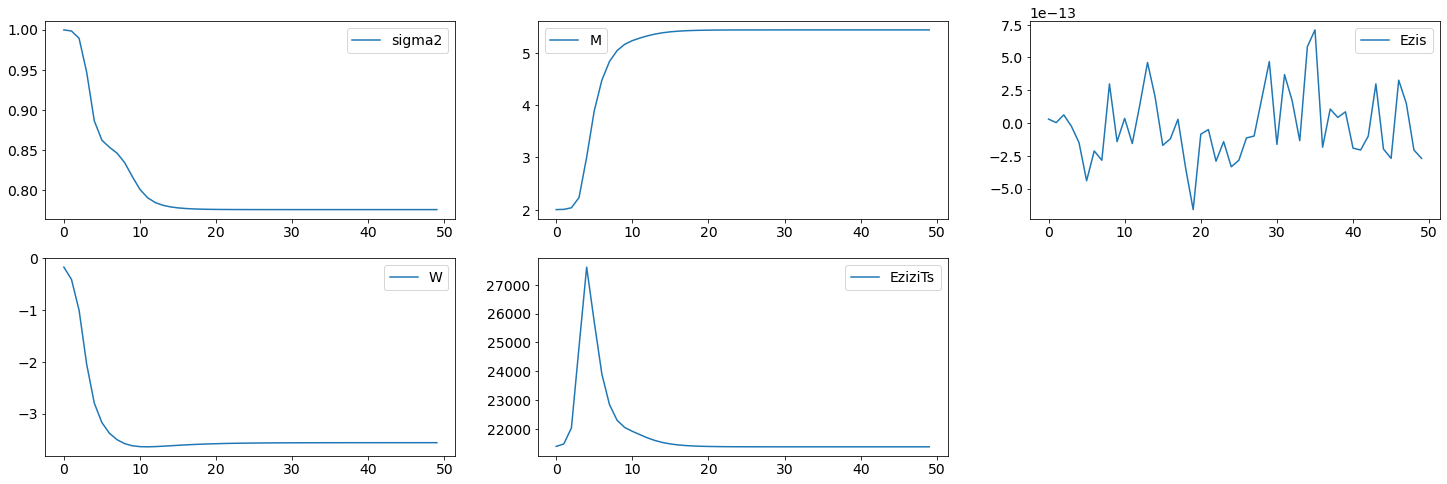

In [12]:
mpl.rcParams['figure.figsize'] = (25, 8)

f, [[ax1, ax2, ax3],[ax4, ax5, ax6]] = plt.subplots(2, 3, squeeze=False)
ax1.plot(x_list, sigma2_list, label='sigma2')
ax1.legend(loc='best')

ax2.plot(x_list, M_list, label='M')
ax2.legend(loc='best')

ax3.plot(x_list, Ezis_list, label='Ezis')
ax3.legend(loc='best')

ax4.plot(x_list, W_list, label='W')
ax4.legend(loc='best')

ax5.plot(x_list, EziziTs_list, label='EziziTs')
ax5.legend(loc='best')

# ax6.plot(x_list, log_list, label='Log likelihood')
# ax6.legend(loc='best')

f.delaxes(ax6)

In [13]:
sigma2

0.7758625058847495

In [14]:
ZisProjetados = []
for i in range(N):
    xi = np.array([data[i]])
    xiLessMi = xi - np.array([Mi])
    
    Minv = pinv(M)
    MinvWT = Minv @ W.T
    zi = MinvWT @ xiLessMi.T # Projeção
#     print(zi)
    ZisProjetados.append([zi[0,0],zi[1,0]])

ZisProjetados = np.array(ZisProjetados)
ZisProjetados

array([[-0.58197038,  0.79877006],
       [-0.97102788,  0.03680574],
       [ 0.98271479,  0.56103117],
       ...,
       [ 0.29779188,  0.53195159],
       [ 0.38770596,  0.39350639],
       [-0.05166487,  0.18216566]])

In [15]:
y.values.T[0]

array([ 5365,  6160,  3800, ...,  6980, 13585,  1400])

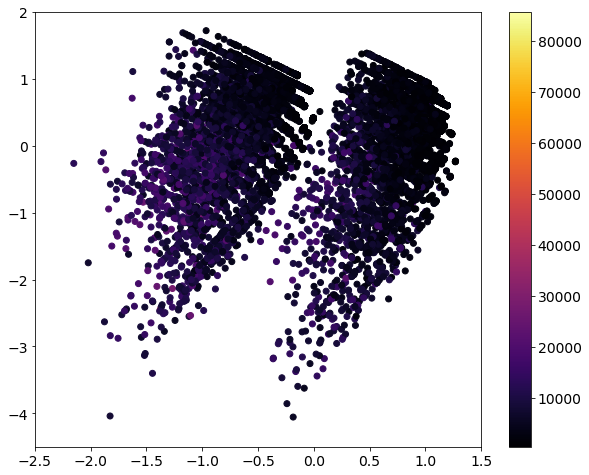

In [16]:
mpl.rcParams['figure.figsize'] = (10, 8)

cm = plt.cm.get_cmap('RdYlBu')

l1 = ZisProjetados[:,0]
l2 = ZisProjetados[:,1]

# scaler = StandardScaler()
# scaler.fit(y)
# y = scaler.transform(y)

# print(y)

# y = np.log(y.values)
# print(y)

plt.scatter(l1, l2, c=y.values.T[0], cmap="inferno")
plt.xlim(-2.5,1.5)
plt.ylim(-4.5,2)
plt.colorbar()
plt.show()

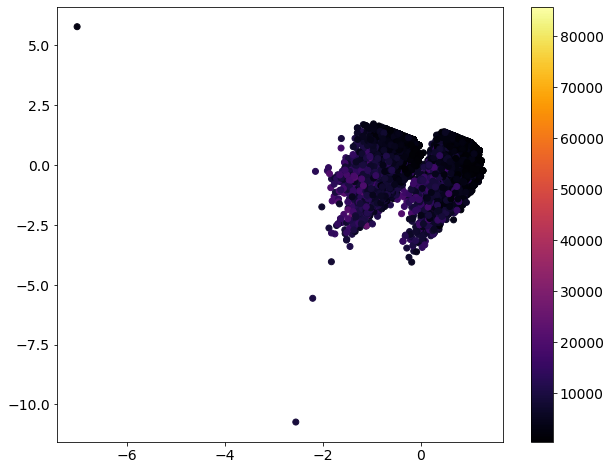

In [17]:
mpl.rcParams['figure.figsize'] = (10, 8)

cm = plt.cm.get_cmap('RdYlBu')

l1 = ZisProjetados[:,0]
l2 = ZisProjetados[:,1]

# scaler = StandardScaler()
# scaler.fit(y)
# y = scaler.transform(y)

# print(y)

# y = np.log(y.values)
# print(y)

plt.scatter(l1, l2, c=y.values.T[0], cmap="inferno")
plt.colorbar()
plt.show()

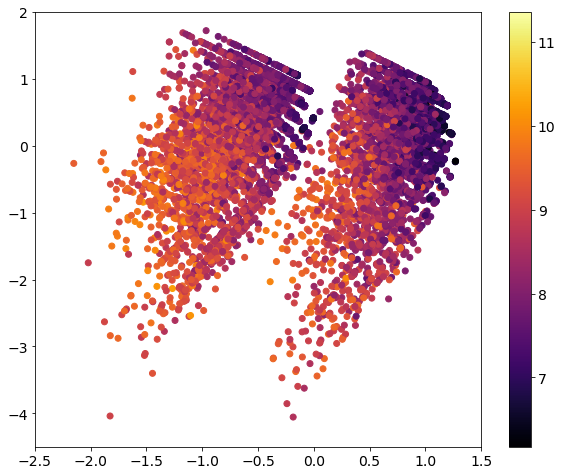

In [18]:
y = np.log(y)

plt.scatter(l1, l2, c=y.values.T[0], cmap="inferno")
plt.xlim(-2.5,1.5)
plt.ylim(-4.5,2)
plt.colorbar()
plt.show()


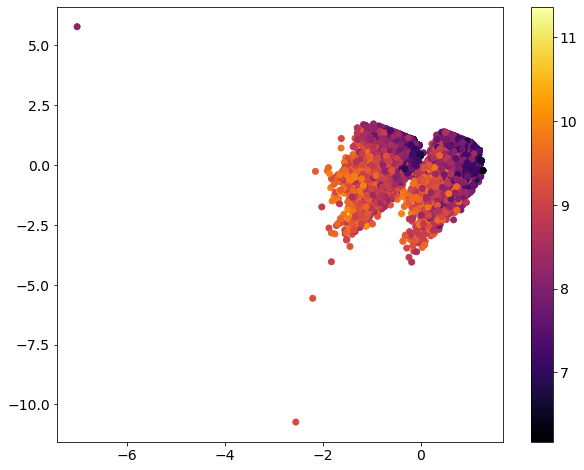

In [19]:
plt.scatter(l1, l2, c=y.values.T[0], cmap="inferno")
plt.colorbar()
plt.show()